In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('TOI_News.csv')
df

,Headline,Genre
0,Here's why Nitesh selected Ranbir for 'Ramayana',Entertainment
1,Tanushree Dutta criticises Hema Committee report,Entertainment
2,Michael C. Hall returns to the ‘Dexter’ universe,Entertainment
3,Behind the scenes moments with Bollywood stars,Entertainment
4,Confirmed! JL files for divorce from Ben Affleck,Entertainment
...,...,...
1147,Devshayani Ekadashi 2024: When is Devshayani E...,Religion
1148,"Skanda Sashti July 2024: Date, Time, Rituals a...",Religion
1149,"Vinayak Chaturthi July 2024: Date, Time, Ritua...",Religion
1150,"Ashadha Amavasya 2024: Date, Time, Rituals and...",Religion


In [23]:
df.Genre.value_counts()

Genre
Health           318
Business         274
Politics         142
Sports           132
Entertainment     75
Education         69
Religion          57
Technology        44
Life-Style        41
Name: count, dtype: int64

In [24]:
# from sklearn.utils import resample


# # Separate the dataset into different genres
# df_balanced = pd.DataFrame()  # Empty DataFrame to store balanced data

# # Determine the size of the largest class
# max_class_size = df['Genre'].value_counts().max()

# # Oversample each genre to match the largest class size
# for genre in df['Genre'].unique():
#     genre_df = df[df['Genre'] == genre]
#     genre_sampled = resample(genre_df, replace=True, n_samples=max_class_size, random_state=42)
#     df_balanced = pd.concat([df_balanced, genre_sampled])

# # Shuffle the balanced dataset
# df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # Save the balanced DataFrame if needed
# # df_balanced.to_csv('balanced_dataset.csv', index=False)


In [25]:
df.Genre.value_counts()

Genre
Health           318
Business         274
Politics         142
Sports           132
Entertainment     75
Education         69
Religion          57
Technology        44
Life-Style        41
Name: count, dtype: int64

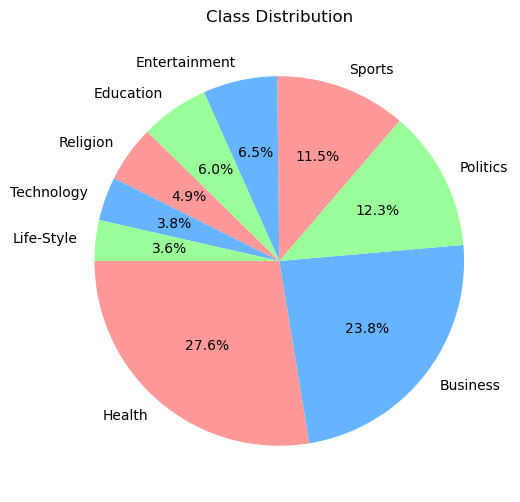

In [26]:
class_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=180, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Class Distribution')
plt.show()

In [27]:
df.isnull().sum()

Headline    35
Genre        0
dtype: int64

In [28]:
df = df.dropna(subset=['Headline'])

In [29]:
df.isnull().sum()

Headline    0
Genre       0
dtype: int64

In [30]:
df.describe()

,Headline,Genre
count,1117,1117
unique,1005,9
top,38:58Money Mantra Ep 5 | Labour Law Advisor fo...,Health
freq,12,283


In [31]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Headline'])
y = df['Genre']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6875


In [36]:
# Define a function to predict the genre of a new title
def predict_genre(title):
    """Predicts the genre of a given title."""
    vector = vectorizer.transform([title])
    prediction = model.predict(vector)[0]
    return prediction

In [37]:
# Test the function with a new title
new_title = input("Enter The Headline >> ")
predicted_genre = predict_genre(new_title)
print(f"The Headline is > '{new_title}' \n Predicted Genre is >> {predicted_genre}")

The Headline is > 'Haryana recruitment process results halted until Assembly elections2' 
 Predicted Genre is >> Business
